# Numerical methods 

In [1]:
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import simpson

### Finding roots of a function
#### Newton-Raphson:
Open method (convergence depends on initial value of $x_0$, so initial good values may be recquired).   
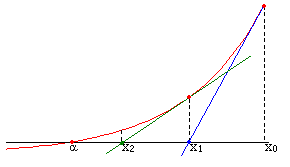  (https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton)    
for root-finding using 1st derivative (approach to the tangent lines with $f_{x_{n+1}}=0$), so that from $f'(x_n)= \frac{f(x_n) - 0}{x_n - x_{n+1}}$, we obtain the iterative equation  
$$x_{n+1}=x_n - \frac{f(x_n)}{f'(x_n)}$$
need some initial $x_0$ and a convergenche threshold 

### DERIVATION

#### Finite difference methods (h finite but still VERY SMALL)
In a general situation   
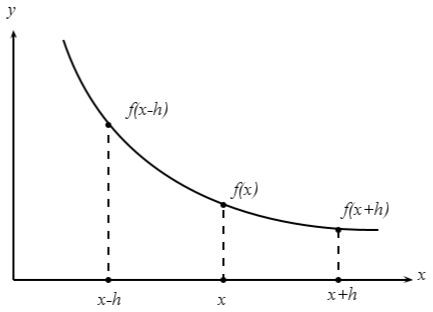 (https://es.wikipedia.org/wiki/Diferencia_finita)   
##### 1st order derivatives
from the derivative definition $f'(x) = \lim_{h \rightarrow 0} \left(\frac{f(x+h)-f(x)}{h} \right)$, 3 diff approaches:
- Forward finite differences: $f'(x) \approx \frac{f(x+h)-f(x)}{h}$
- Backward finite differences: $f'(x) \approx \frac{f(x)-f(x-h)}{h}$
- Central finite differences: $f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$
#### 2nd order derivatives  
By truncating the central approximation $y$ value to the 2 first even terms in a Taylor series expansion of this $y=f(x+h)+(x-h)$ (odds may be needed to determine boundary conditions):
$$f''(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2} + (\mathcal{O}^2)$$

##### ex: 
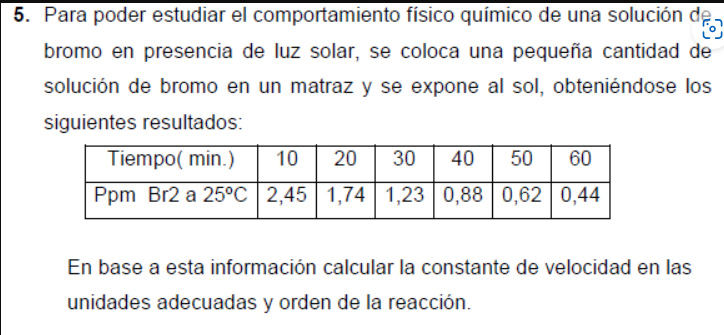 (https://metodosnumericos-fiq.blogspot.com/2013/01/diferenciacion-numerica.html)

Estimated first-order rate constant k: 0.03431 min^-1
Estimated second-order rate constant k: 0.02396 min^-1


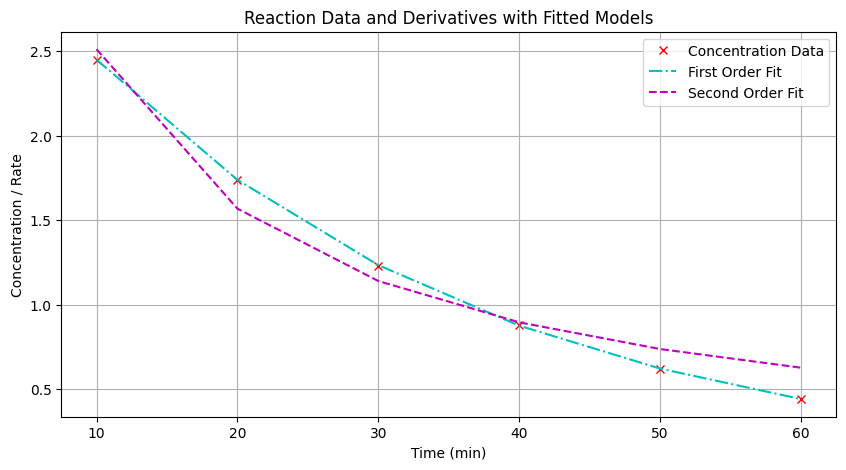

In [2]:
def derivative_central(y, x):
    return (y[2:] - y[:-2]) / (x[2:] - x[:-2])

def second_derivative_central(y, x):
    return (y[2:] - 2*y[1:-1] + y[:-2]) / ((x[1] - x[0])**2)

def first_order(t, k, C0):
    return C0 * np.exp(-k * t)

def second_order(t, k, C0):
    return 1 / (1 / C0 + k * t)

#data
time = np.array([10, 20, 30, 40, 50, 60])
concentration = np.array([2.45, 1.74, 1.23, 0.88, 0.62, 0.44])

## MAIN
# derivatives +fit to n-th order
dCdt = derivative_central(concentration, time)
d2Cdt2 = second_derivative_central(concentration, time)
time_mid = time[1:-1]

params, _ = opt.curve_fit(first_order, time, concentration, p0=(0.01, 2.45))
k1, C0 = params
print(f"Estimated first-order rate constant k: {k1:.5f} min^-1")
params2, _ = opt.curve_fit(second_order, time, concentration, p0=(0.01, 2.45))
k2, C0_2 = params2
print(f"Estimated second-order rate constant k: {k2:.5f} min^-1")

#plot fittings vs experimental data
plt.figure(figsize=(10, 5))
plt.plot(time, concentration, 'rx', label='Concentration Data')
plt.plot(time, first_order(time, k1, C0), 'c-.', label='First Order Fit')
plt.plot(time, second_order(time, k2, C0_2), 'm--', label='Second Order Fit')
plt.xlabel('Time (min)')
plt.ylabel('Concentration / Rate')
plt.legend()
plt.title('Reaction Data and Derivatives with Fitted Models')
plt.grid()
plt.show()

### INTEGRATION

#### SIMPSON'S RULES 
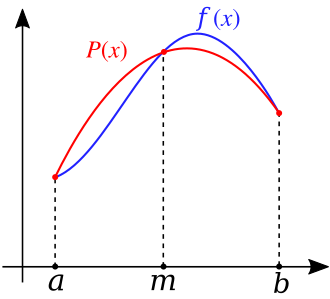 (https://en.wikipedia.org/wiki/Simpson%27s_rule)  
Simpson's rule can be derived by approximating the integrand $f (x)$  by the interpolant $P(x)$. 
##### 1) SIMPSON's 1/3  
By using QUADRATIC interpolation of $P(x)$ (which means $n=2$), expression for the definite integral is
$$\int_a^b f(x)dx \approx \frac{b-a}{6} \left[ f(a) +4f\left(\frac{a+b}{2}\right)+f(b) \right] \approx  \frac{1}{3}h \left[ f(a) +4f(a+h)+f(b) \right]$$ 
where the interval $[a,b]$ has been divided into $n$ equal subintervals $h=\frac{b-a}{n}$.   
The _Composite_ Simpson's 1/3 rule is obtained after giving alternated weights of $4/3, 2/3$ for the points inside the integration range.
$$ \int_a^b f(x)dx \approx \frac{1}{3} h \left[ f(x_0=a) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + 2\sum_{i=1}^{n/2\space -1} f(x_{2i}) + f(x_n=b) \right] $$

##### 2) SIMPSON's 3/8
Similarly, using CUBIC interpolation of $P(x)$ ($n=3$), expression for the definite integral is
$$\int_a^b f(x)dx \approx \frac{b-a}{8} \left[f(a)+ 3f\left(\frac{2a+b}{3}\right) +2f\left(\frac{a+2b}{3}\right) +f(b) \right] \approx  \frac{3}{8}h \left[ f(a) +3f(a+h) +2f(a+2h) +f(b) \right]$$ 
where now $h=\frac{b-a}{3}$, and The _Composite_ Simpson's 3/8 rule is 
$$ \int_a^b f(x)dx \approx \frac{3}{8} h \left[ f(x_0=a) + 3\sum_{i=1,3|i}^{n-1} f(x_i) + 2\sum_{i=1}^{n/3\space -1} f(x_{3i}) + f(x_n=b) \right] $$
where the term $ \sum_{i=1,3|i}^{n-1} $ means summation is taken over all values of $i \in 1,2,...,n-1$ that are divisible by (multiples of) $3$.

##### ex: Use simpson's rules to approach the integral F(x)  $$\int_{-2}^2 x^3 e^{-x} \cos(x) dx$$  

In [17]:
x=np.linspace(-1.5,2,801)
n=len(x)
h= (x[-1]-x[0])/n
def f(x):
    return x**3*np.exp(-x)*np.cos(x)

# Simpson's 1/3 rule
def SIMPSONS_13(f,x):
    sum_x= f(x[0])+ f(x[-1]) 
    #iterate from i=1 to n-1
    for i in range(1,n):
        if i%2!= 0:
            sum_x+= 4*f(x[i])
        elif i%2==0:
            sum_x+= 2*f(x[i])
    return (h/3)* sum_x

# Simpson's 3/8 rule 
def SIMPSONS_38(f, x):
    sum_x = f(x[0])+f(x[-1])  
    for i in range(1, n):
        if i%3 ==0:
            sum_x+= 2*f(x[i]) 
        else:
            sum_x+= 3*f(x[i]) 
    return (3*h/8) *sum_x 

#RESULTS
integral_13=SIMPSONS_13(f,x)
integral_38 = SIMPSONS_38(f, x)

latex = r"\int_{-1.5}^{2} x^3 e^{-x} \cos(x) \,dx = "
latex_13= latex + str(integral_13)
latex_38= latex + str(integral_38) 

print('Integrals result using...')
print('Simpsons 1/3 rule:')
display(Math(latex_13))
print('Simpsons 3/8 rule:')
display(Math(latex_38))
print('Analytic result is 1.24022 according WolframAlpha')

Integrals result using...
Simpsons 1/3 rule:


<IPython.core.display.Math object>

Simpsons 3/8 rule:


<IPython.core.display.Math object>

Analytic result is 1.24022 according WolframAlpha


THIS FUNCTIONS CAN BE USED WITH PRE-BUILD FUNCTIONS IN SCIPY MODULE:

In [15]:
# range [a,b] and step size n (EVEN!)
y= f(x)
i13 = simpson(y,x)

C:\Users\USER\AppData\Local\Temp\ipykernel_17580\1135082061.py:3: DeprecationWarning: You are passing x=[-1.500000e+00 -1.495625e+00 -1.491250e+00 -1.486875e+00 -1.482500e+00
 -1.478125e+00 -1.473750e+00 -1.469375e+00 -1.465000e+00 -1.460625e+00
 -1.456250e+00 -1.451875e+00 -1.447500e+00 -1.443125e+00 -1.438750e+00
 -1.434375e+00 -1.430000e+00 -1.425625e+00 -1.421250e+00 -1.416875e+00
 -1.412500e+00 -1.408125e+00 -1.403750e+00 -1.399375e+00 -1.395000e+00
 -1.390625e+00 -1.386250e+00 -1.381875e+00 -1.377500e+00 -1.373125e+00
 -1.368750e+00 -1.364375e+00 -1.360000e+00 -1.355625e+00 -1.351250e+00
 -1.346875e+00 -1.342500e+00 -1.338125e+00 -1.333750e+00 -1.329375e+00
 -1.325000e+00 -1.320625e+00 -1.316250e+00 -1.311875e+00 -1.307500e+00
 -1.303125e+00 -1.298750e+00 -1.294375e+00 -1.290000e+00 -1.285625e+00
 -1.281250e+00 -1.276875e+00 -1.272500e+00 -1.268125e+00 -1.263750e+00
 -1.259375e+00 -1.255000e+00 -1.250625e+00 -1.246250e+00 -1.241875e+00
 -1.237500e+00 -1.233125e+00 -1.228750e+00 -

In [16]:
i13

-1.240222699751342